In [1]:
from dasly.master import Dasly
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the YAML file
yaml_path = '../config_aastfjordbrua.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [35]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
das = Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua',
    # start=start,
    start='20231005 082400',  # One car
    # start='20231005 094345',
    # start='20231005 082445',
    # start='20231005 082445',
    # start='20230901 103015',  # full 2 lines
    # start='20230901 163110',  # part of lines
    # start='20230901 183015',  # noise
    # start='20230901 104015',  # 2 lines close to each other
    # start='20231005 104715',  # 2 truck + 2 cars
    # start='20231005 082155',  # 1 truck
    # start='20231005 082130',  # 4 cars
    # start='20231005 090535',  # 2 trucks + 4 cars following each other
    duration=60,
    integrate=False,
    chIndex=chIndex,
    reset_channel_idx=True,
)

7 files, from 082354 to 082454


Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 5e-09.


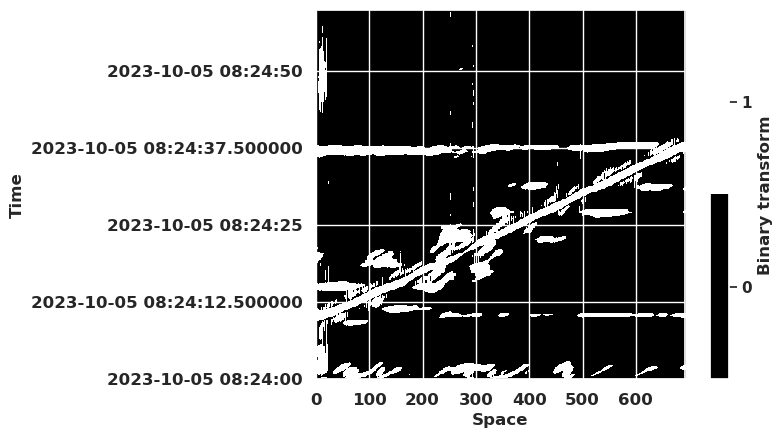

In [36]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)
das.sobel_filter()
das.binary_transform(threshold=5e-9)
das.heatmap(colorbar_label='Binary transform')

31 lines are detected.


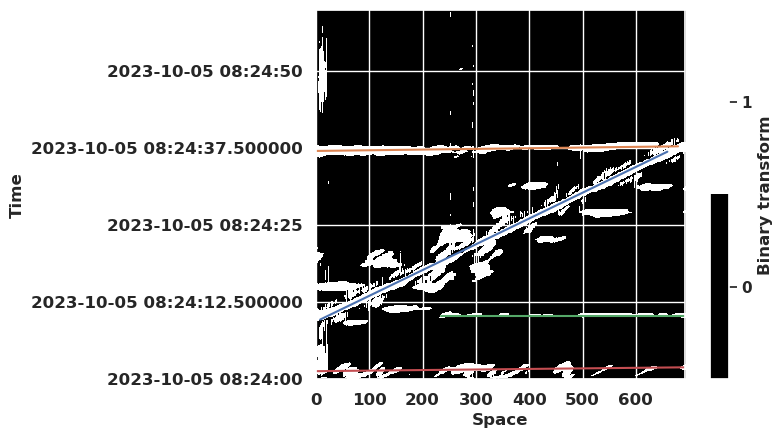

In [37]:
das.hough_transform(target_speed=85, speed_res=0.5, length_meters=400)
das.dbscan(eps_seconds=2)
das.heatmap(colorbar_label='Binary transform')

In [5]:
das.lines_df[['s', 't', 'speed_kmh']]

,s,t,speed_kmh
0,669.0,28.000,86.014286
1,626.0,26.125,86.262201
2,684.0,28.375,86.780617
